In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import Callable, Tuple
import random
import math


In [2]:
def noise(freq, series_len):
  # """Return single frequency noise

  #   Parameters
  #   ----------
  #   freq: int
  #     Noise frequency
  #   series_len: int
  #     Length of noise vector
  #
  #   Returns
  #   -------
  #   [float]
  #     The noise vector of a given frequency
  # """
  phase = random.uniform(0, 2*math.pi)
  return np.array([math.sin(2*math.pi * freq*x/series_len + phase) for x in range(series_len)])

In [5]:
def generate_noise(series_len = 1_000, amplitude = lambda f: 1, frequencies = range(1, 1001), random_seed = 0, debugging = False):
  # """Generates noise of different spectrum

  #   Parameters
  #   ----------
  #   series_len: int
  #     Length of noise vector
  #   amplitude: Callable[[int], float]
  #     Should return amplitude depending on frequency. Return const 1 by default.
  #   frequencies: [int]
  #     Range of frequencies
  #   random_seed: int
  #     Value for random.seed()
  #   debugging: boolean
  #     Flag to activate debug mode
  #
  #   Returns
  #   -------
  #   [float]
  #     The noise vector of a given spectrum
  # """
  random.seed(random_seed)
  sum_of_noises = [0.0] * series_len
  amplitudes = np.array([amplitude(f) for f in frequencies])
  noises = np.array([noise(f, series_len) for f in frequencies])

  if debugging:
    print('amplitudes length = {}'.format(len(amplitudes)))
    print('noises length = {}'.format(len(noises)))

  for k in range(len(noises)):
    sum_of_noises += amplitudes[k] * noises[k]

  return sum_of_noises

In [6]:
def next_value(x_t: float, delta: float = 0.1, f_t: float = 0) -> float:
  # """Calculate value of x(t+1) depending on x(t), f(t) and delta t

  #   Parameters
  #   ----------
  #   x_t: float
  #     Value of the function in point t
  #   delta: float
  #     Increment of the argument
  #   f_t: float
  #     Noise in point t

  #   Returns
  #   -------
  #   float
  #     Value of the function in point t+1
  # """
  return x_t + delta*np.sin(x_t) + delta*f_t


## Common settings

In [7]:
series_len = 1050

# generate initial function value
x_t = np.random.rand()

# Without noise

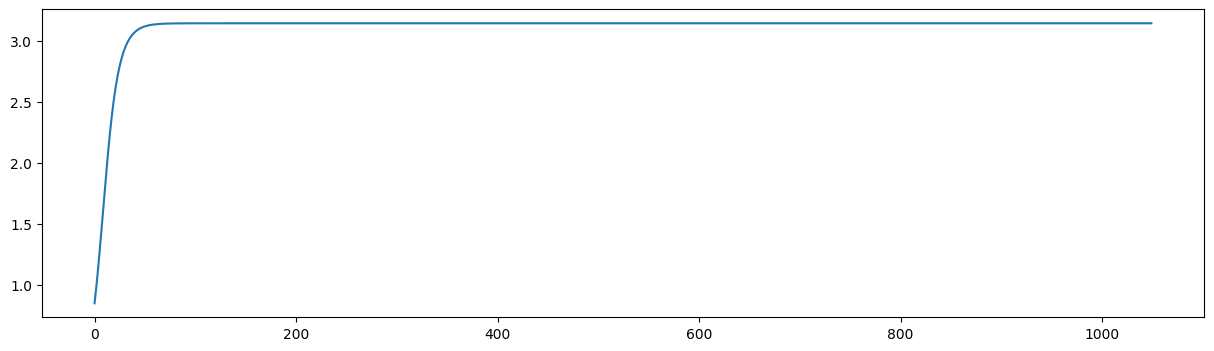

In [8]:
x_ts = []
for t in range(series_len):
  x_ts.append(x_t)
  x_t = next_value(x_t)

plt.figure(figsize=(15, 4))
plt.plot(x_ts)

# White noise

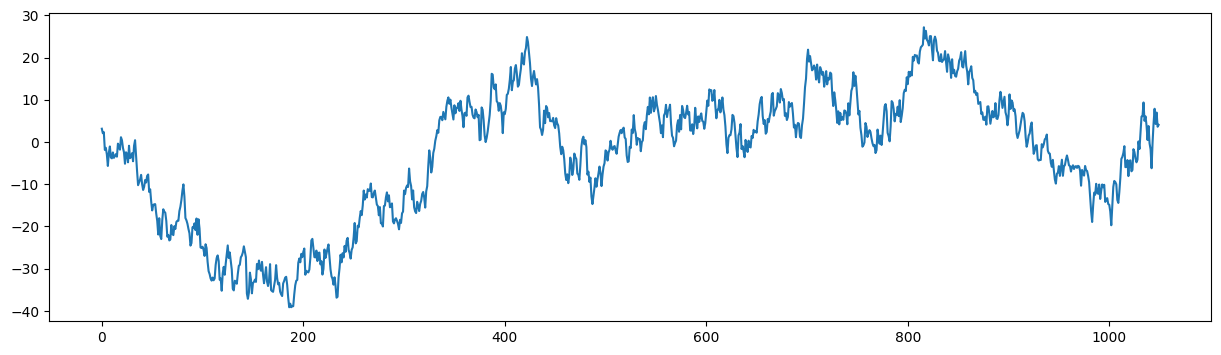

In [9]:
white_noise = generate_noise(series_len)

x_ts = []
for t in range(series_len):
  x_ts.append(x_t)
  x_t = next_value(x_t, f_t=white_noise[t])

plt.figure(figsize=(15, 4))
plt.plot(x_ts)

## Brown noise

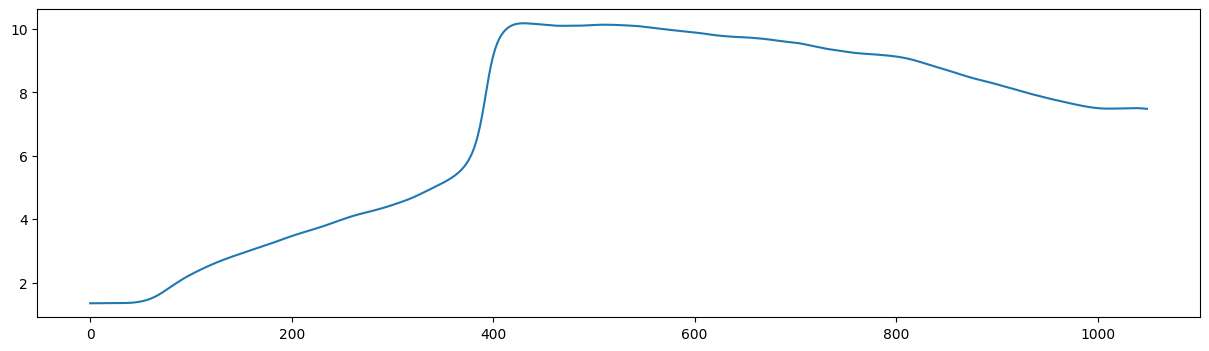

In [10]:
brown_noise = generate_noise(series_len, amplitude=lambda f: 1/f/f)

x_ts = []
for t in range(series_len):
  x_ts.append(x_t)
  x_t = next_value(x_t, f_t=brown_noise[t])

plt.figure(figsize=(15, 4))
plt.plot(x_ts)

## Pink noise

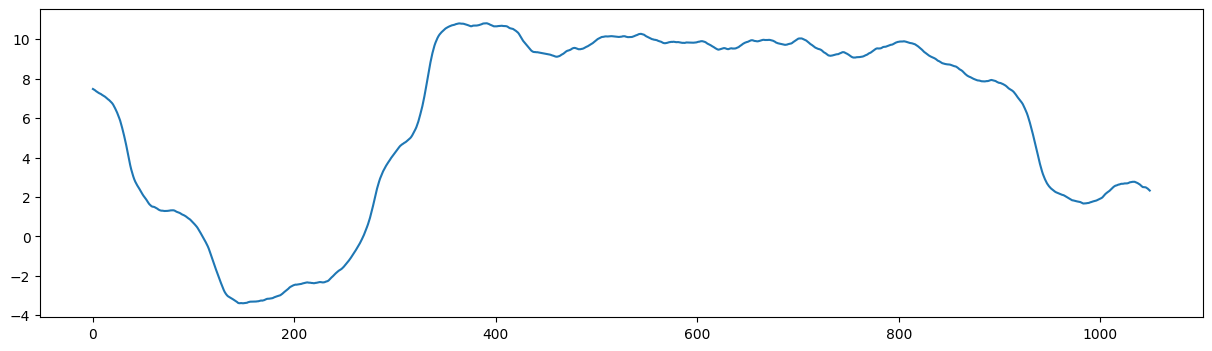

In [11]:
pink_noise = generate_noise(series_len, amplitude=lambda f: 1/f)

x_ts = []
for t in range(series_len):
  x_ts.append(x_t)
  x_t = next_value(x_t, f_t=pink_noise[t])

plt.figure(figsize=(15, 4))
plt.plot(x_ts)

## Blue noise

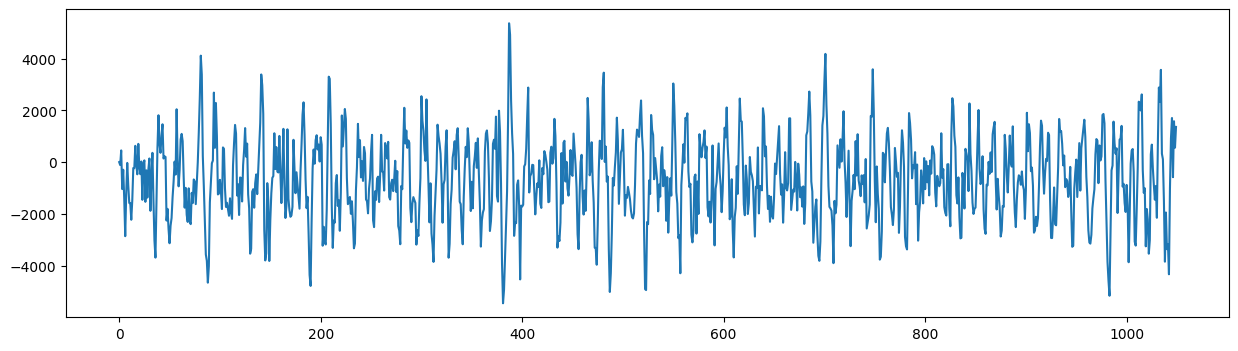

In [12]:
blue_noise = generate_noise(series_len, amplitude=lambda f: f)

x_ts = []
for t in range(series_len):
  x_ts.append(x_t)
  x_t = next_value(x_t, f_t=blue_noise[t])

plt.figure(figsize=(15, 4))
plt.plot(x_ts)

## Violet noise

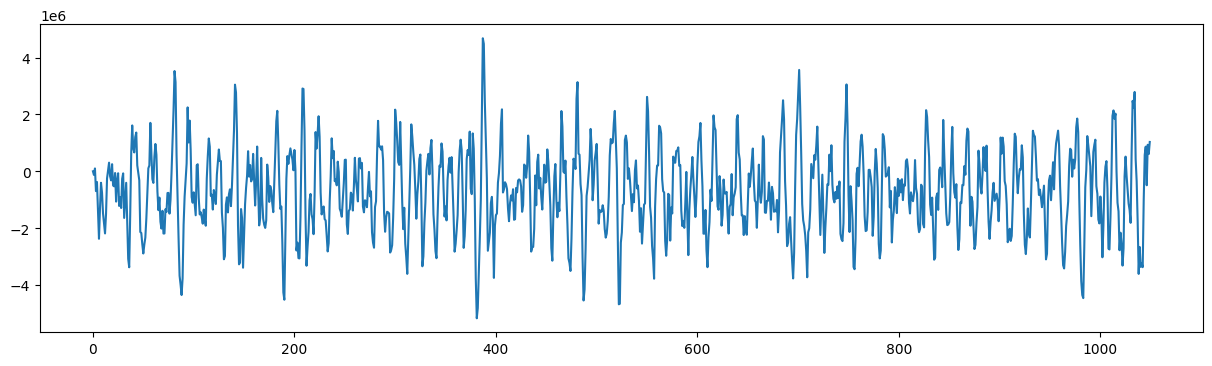

In [13]:
violet_noise = generate_noise(series_len, amplitude=lambda f: f*f)

x_ts = []
for t in range(series_len):
  x_ts.append(x_t)
  x_t = next_value(x_t, f_t=violet_noise[t])

plt.figure(figsize=(15, 4))
plt.plot(x_ts)